In [2]:
!git clone https://github.com/imostafizur/CSE498R.git

fatal: destination path 'CSE498R' already exists and is not an empty directory.


## Malaria Detection using EfficientNet-B7

In [3]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D, DepthwiseConv2D, ZeroPadding2D, Add, Multiply, Lambda, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import constraints
from tensorflow.keras import activations
from tensorflow.keras import utils
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import models
from tensorflow.keras import callbacks
from tensorflow.keras import layers

In [4]:
image = ('cell_images')

In [5]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)


In [6]:
# Data Generator
train_generator = train_datagen.flow_from_directory(
    image,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')
    

Found 22048 images belonging to 2 classes.


In [7]:
# EfficientNet-B7 Model
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

258088960/258076736 [==============================] - 4s 0us/step


In [8]:
# Model Layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Model training
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

In [10]:
# Model Compile
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
# Model Checkpoint
checkpoint = ModelCheckpoint('EfficientNet-B7.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# Model Early Stopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [12]:
# Model Fit
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=train_generator,
    validation_steps=100,
    callbacks=[checkpoint, early])
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.7616 - accuracy: 0.5094
Epoch 1: val_loss improved from inf to 0.69312, saving model to EfficientNet-B7.h5
100/100 [==============================] - 131s 995ms/step - loss: 0.7616 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.7347 - accuracy: 0.4891
Epoch 2: val_loss did not improve from 0.69312
100/100 [==============================] - 92s 925ms/step - loss: 0.7347 - accuracy: 0.4891 - val_loss: 0.6932 - val_accuracy: 0.4953
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.7122 - accuracy: 0.5141
Epoch 3: val_loss improved from 0.69312 to 0.69306, saving model to EfficientNet-B7.h5
100/100 [==============================] - 93s 936ms/step - loss: 0.7122 - accuracy: 0.5141 - val_loss: 0.6931 - val_accuracy: 0.5088
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.7122 - accuracy:

In [13]:
# Model Evaluation
score = model.evaluate_generator(train_generator, steps=100)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test loss: 0.6932578086853027
Test accuracy: 0.4971874952316284


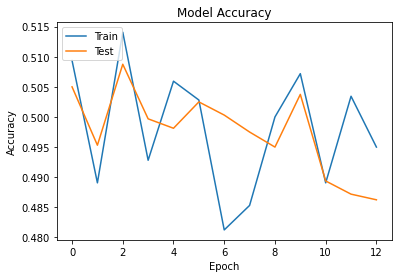

In [14]:
# Accuracy Plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [15]:
# Save Model
model.save('Malaria_EfficientNet-B7.h5')